<a href="https://colab.research.google.com/github/Elena-7719/DataS/blob/main/Hausaufgabe_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import zipfile
import os
zip_path = 'archive (1).zip'
#Распаковываем архив в текущую папку
with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall('.')
print("Распаковка заввершена!")

Распаковка заввершена!


In [25]:
# Просматриваем первые несколько строк датасета
print(df.head())

# Получаем общую информацию о датасете
print(df.info())

# Выводим статистические данные о числовых столбцах
print(df.describe())

   Patient_ID  age  gender   bmi  blood_pressure  fasting_glucose_level  \
0           1   77  Female  33.8             154                     93   
1           2   54    Male  19.2             123                     94   
2           3   25    Male  33.7             141                    150   
3           4   23  Female  32.8             140                    145   
4           5   70    Male  33.7             165                     90   

   insulin_level  HbA1c_level  cholesterol_level  triglycerides_level  \
0           12.1          5.2                242                  194   
1            4.6          5.4                212                   76   
2           10.8          6.9                247                  221   
3           11.6          6.8                195                  193   
4           18.3          5.6                217                  170   

  physical_activity_level  daily_calorie_intake  sugar_intake_grams_per_day  \
0                     Low      

In [ ]:
#Посмотрим какие файлы появились
import os
print ("Содержимое папки после распаковки:")
print (os.listdir('.'))

Содержимое папки после распаковки:
['.config', '.ipynb_checkpoints', 'diabetes_risk_dataset.csv', 'archive (1).zip', 'sample_data']


In [ ]:
#прочитаем файл .csv с помощью pandas
df = pd.read_csv('diabetes_risk_dataset.csv')
df.head() #посмотрим первые строки

,Patient_ID,age,gender,bmi,blood_pressure,fasting_glucose_level,insulin_level,HbA1c_level,cholesterol_level,triglycerides_level,physical_activity_level,daily_calorie_intake,sugar_intake_grams_per_day,sleep_hours,stress_level,family_history_diabetes,waist_circumference_cm,diabetes_risk_score,diabetes_risk_category
0,1,77,Female,33.8,154,93,12.1,5.2,242,194,Low,2169,78.4,8.1,4,No,101.1,52.3,Prediabetes
1,2,54,Male,19.2,123,94,4.6,5.4,212,76,High,1881,16.5,6.6,3,No,60.0,3.7,Low Risk
2,3,25,Male,33.7,141,150,10.8,6.9,247,221,Low,2811,147.9,6.7,10,Yes,114.7,87.3,High Risk
3,4,23,Female,32.8,140,145,11.6,6.8,195,193,Low,2826,98.3,4.4,9,Yes,96.6,76.1,High Risk
4,5,70,Male,33.7,165,90,18.3,5.6,217,170,Moderate,2610,65.8,9.1,5,Yes,107.4,47.7,Prediabetes


In [ ]:
from sqlite3.dbapi2 import Cursor
import sqlite3

#соединяемся с базой данных
conn = sqlite3.connect('diabetes.db')
cursor = conn.cursor()
print ("База данных создана подключена")

База данных создана подключена


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from genericpath import exists



In [ ]:
#создание таблицы
cursor= conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS diabetes_data (user_id INTEGER PRIMARY KEY AUTOINCREMENT,
Patient_ID INTEGER,
age Integer,
bmi REAL,
blood_pressure INTEGER,
fasting_glucose_level Integer,
insulin_leveL Real,
cholesterol_level INTEGER,
daily_calorie_intake Integer,
family_history_diabetes TEXT,
sleep_hours REAL,
stress_level INTEGER,
diabetes_risk_score REAL,
diabetes_risk_category TEXT
)
''')
conn. commit()
print("Таблица создана проверена успешно!")


Таблица создана проверена успешно!


In [26]:

#загрузка данных

df_selected = pd.read_sql_query("""
SELECT Patient_ID', 'age', 'bmi', 'blood_pressure', 'fasting_glucose_level', 'insulin_level', 'cholesterol_level', 'daily_calorie_intake', 'family_history_diabetes', 'sleep_hours','stress_level', 'diabetes_risk_score', 'diabetes_risk_category'
FROM diabetes_data
""",conn)
print (df_selected.head())


DatabaseError: Execution failed on sql '
SELECT Patient_ID', 'age', 'bmi', 'blood_pressure', 'fasting_glucose_level', 'insulin_level', 'cholesterol_level', 'daily_calorie_intake', 'family_history_diabetes', 'sleep_hours','stress_level', 'diabetes_risk_score', 'diabetes_risk_category'
FROM diabetes_data
': near "age": syntax error

# Новый раздел

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#определяем функцию  для выполнения запросов
def execute_query(query):
  cursor.execute(query)
  return cursor.fetchall()

In [ ]:
#определяем возраст респондентов с высоким риском диабета
conn =sqlite3.connect('diabetes.db')
print("Возраст респондентов с высоким уровнем диабета:")
query1="SELECT age FROM diabetes_data WHERE diabetes_risk_category='High Risk'"
result1 = pd.read_sql(query1, conn)
print (result1)

Возраст респондентов с высоким уровнем диабета:
Empty DataFrame
Columns: [age]
Index: []


In [ ]:
query_low = "SELECT age FROM diabetes_data WHERE diabetes_risk_category='Low Risk'"

In [ ]:
#подсчет респондентов до 30 лет с высоким уровнем диабета

import sqlite3
import pandas as pd
conn =sqlite3.connect('diabetes.db')
query2="""
SELECT COUNT (*) as count
FROM diabetes_data
WHERE  diabetes_risk_category = 'Higt risk'
AND age<30
"""
result2 = pd.read_sql(query2, conn)
count =result2 ['count'][0]
print (f"Количество респоендентов до 30 лет с высоким уровнем диабета:{count}")

conn.close()

Количество респоендентов до 30 лет с высоким уровнем диабета:0


In [ ]:
#определяем возраст респондентов с высоким риском диабета
conn =sqlite3.connect('diabetes.db')
print("Возраст респондентов с высоким уровнем диабета:")
query="SELECT age FROM diabetes_data WHERE diabetes_risk_category= 'High Risk'"
result = pd.read_sql(query, conn)
print (result)


Возраст респондентов с высоким уровнем диабета:
Empty DataFrame
Columns: [age]
Index: []


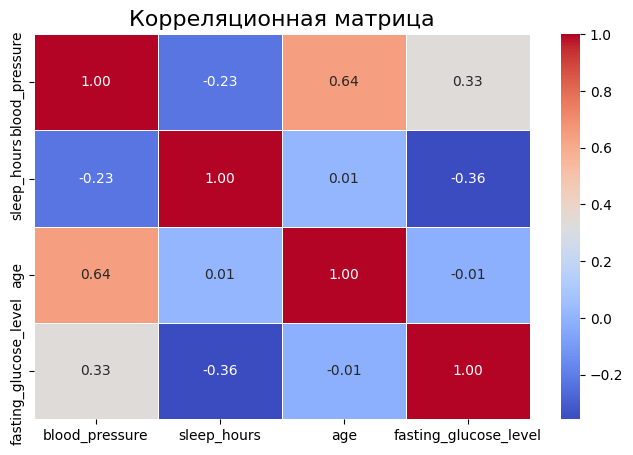

In [ ]:
# Тепловая карта корреляций между числовыми переменными
# Выберем числовые столбцы
numeric_cols = ['blood_pressure', 'sleep_hours', 'age', 'fasting_glucose_level']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица', fontsize=16)
plt.show()

conn.close()



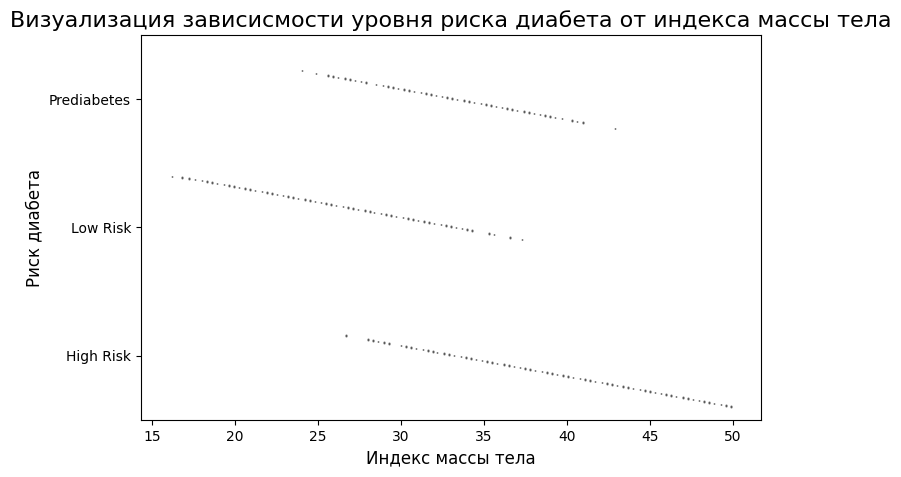

In [ ]:
# Визуализация зависисмости уровня риска диабета от индекса массы тела
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='bmi',
    y='diabetes_risk_category',
    data=df,
    hue='bmi',
    palette='Set2',
    legend=False)
plt.title('Визуализация зависисмости уровня риска диабета от индекса массы тела', fontsize=16)
plt.xlabel('Индекс массы тела', fontsize=12)
plt.ylabel('Риск диабета', fontsize=12)
plt.show()



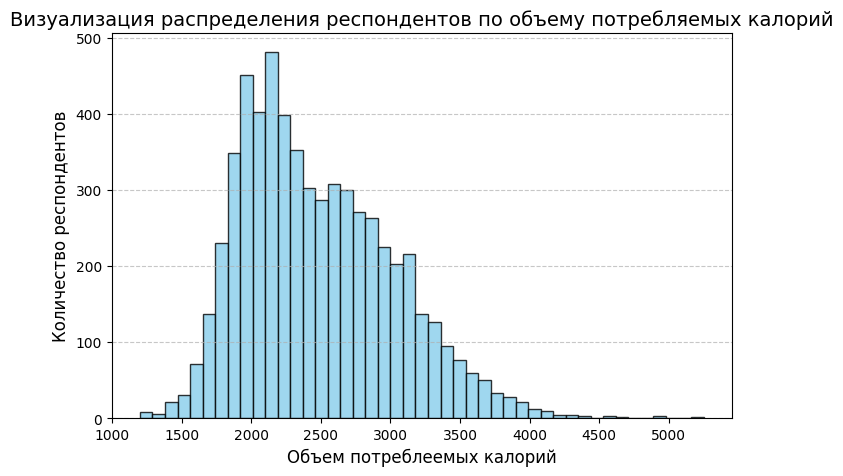

In [ ]:
# Визуализация распределения респондентов по объему потребляемых калорий
plt.figure(figsize=(8, 5))
plt.hist(df['daily_calorie_intake'], bins=45, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Визуализация распределения респондентов по объему потребляемых калорий', fontsize=14)
plt.xlabel('Объем потреблеемых калорий', fontsize=12)
plt.ylabel('Количество респондентов', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()